In [1]:
import os

import torch
import numpy as np

from bmadx.beam_generator import create_beam
from bmadx.plot import plot_projections

from synthetic_data import create_data
from fitting import train_model

from phase_space_reconstruction.analysis import compare_screens

In [2]:
data_dir = 'data'

gt_beam = create_beam(base_yaml = os.path.join(data_dir,'base.yaml'),
                      transforms_yaml = os.path.join(data_dir,'transforms.yaml'), 
                      p0c = 10.0e6,
                      save_as = os.path.join('data', 'gt_beam.pt'))

ground truth distribution saved at data/gt_beam.pt


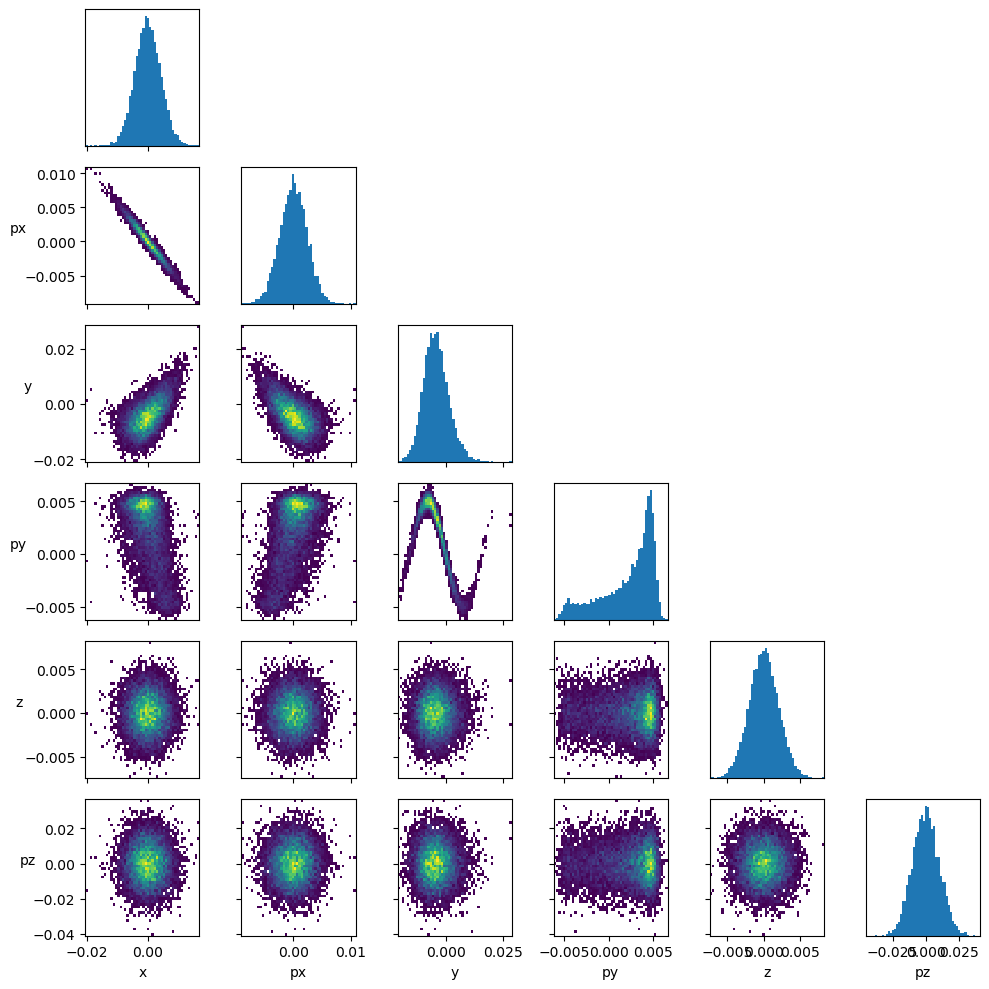

In [3]:
# plot projections
plot_projections(gt_beam.data.numpy(),
                 labels=['x', 'px', 'y', 'py', 'z', 'pz'],
                 bins=50,
                 background=False)

number of images = 20

image 0
k = tensor([-25.]) 1/m
stdx = 167.7736053466797 mm


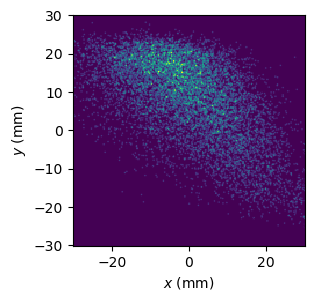

image 1
k = tensor([-22.8947]) 1/m
stdx = 143.21090698242188 mm


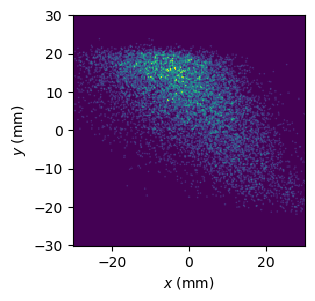

image 2
k = tensor([-20.7895]) 1/m
stdx = 120.74142456054688 mm


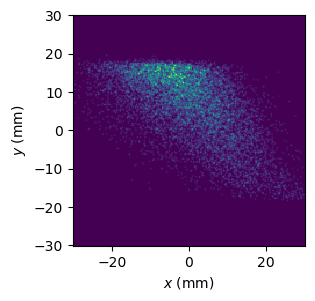

image 3
k = tensor([-18.6842]) 1/m
stdx = 100.3250503540039 mm


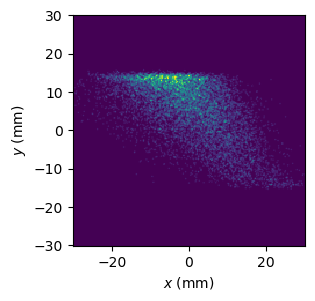

image 4
k = tensor([-16.5789]) 1/m
stdx = 81.92236328125 mm


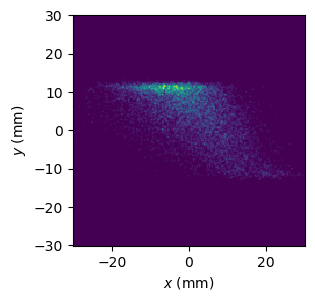

image 5
k = tensor([-14.4737]) 1/m
stdx = 65.49439239501953 mm


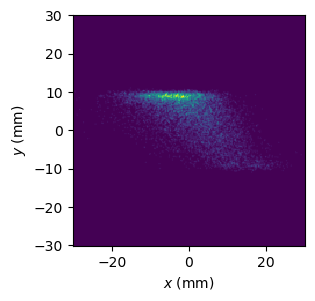

image 6
k = tensor([-12.3684]) 1/m
stdx = 51.002681732177734 mm


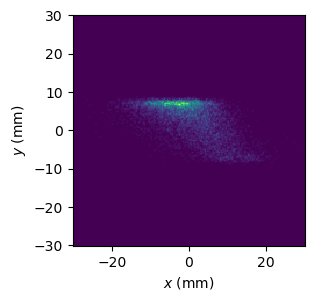

image 7
k = tensor([-10.2632]) 1/m
stdx = 38.409366607666016 mm


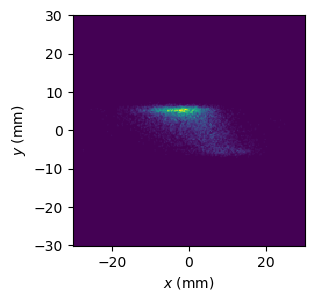

image 8
k = tensor([-8.1579]) 1/m
stdx = 27.677026748657227 mm


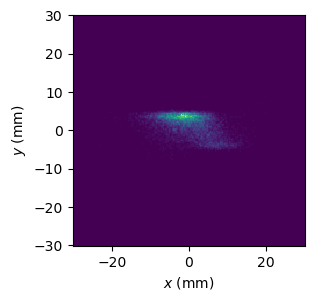

image 9
k = tensor([-6.0526]) 1/m
stdx = 18.7687931060791 mm


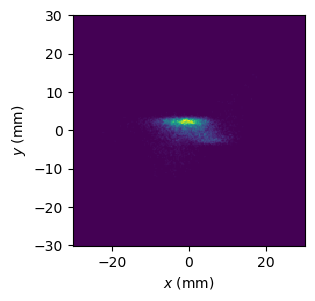

image 10
k = tensor([-3.9474]) 1/m
stdx = 11.648297309875488 mm


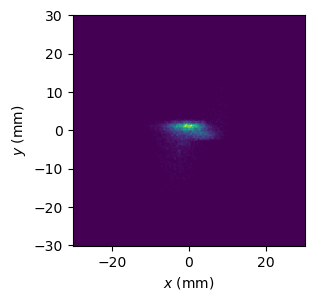

image 11
k = tensor([-1.8421]) 1/m
stdx = 6.279647350311279 mm


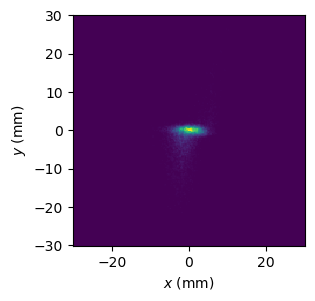

image 12
k = tensor([0.2632]) 1/m
stdx = 2.627457618713379 mm


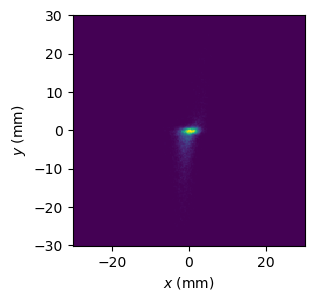

image 13
k = tensor([2.3684]) 1/m
stdx = 0.656818687915802 mm


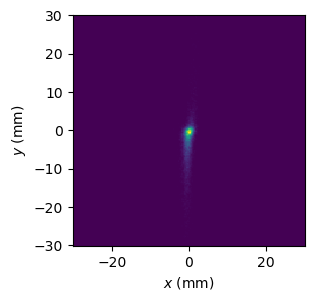

image 14
k = tensor([4.4737]) 1/m
stdx = 0.3332996964454651 mm


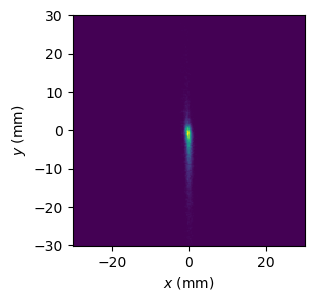

image 15
k = tensor([6.5789]) 1/m
stdx = 1.6229411363601685 mm


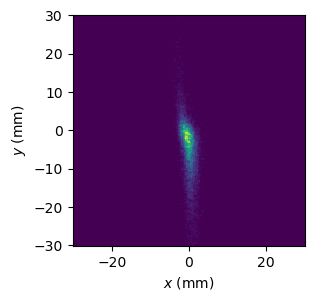

image 16
k = tensor([8.6842]) 1/m
stdx = 4.492247581481934 mm


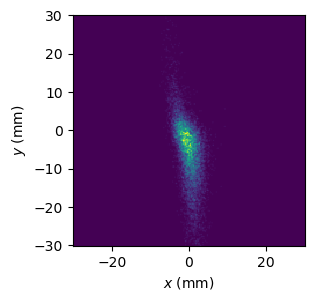

image 17
k = tensor([10.7895]) 1/m
stdx = 8.908188819885254 mm


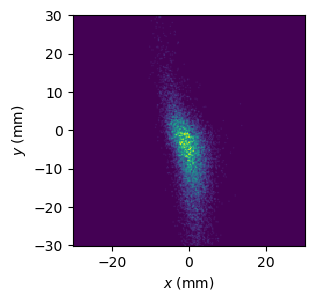

image 18
k = tensor([12.8947]) 1/m
stdx = 14.838180541992188 mm


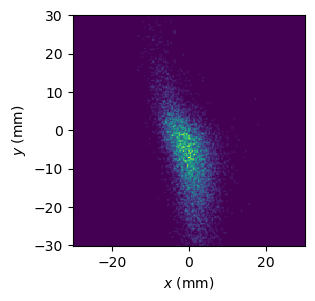

image 19
k = tensor([15.]) 1/m
stdx = 22.250091552734375 mm


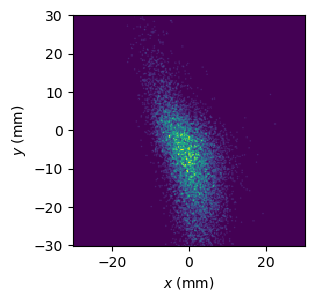

In [4]:
# scan parameters:
n_images = 20
quad_strengths = np.linspace(-25, 15, n_images)

# generate training images
scan_data = create_data(gt_beam, quad_strengths, verbose=True)

In [5]:
# training
prediction = train_model(scan_data, n_epochs=500, device='cuda')

Using device: cuda


/home/jp/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0 tensor(4552422.5000, device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(1135479.3750, device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(1103632.6250, device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(1095549.5000, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(1076467.3750, device='cuda:0', grad_fn=<MulBackward0>)


In [6]:
print(prediction['images'])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [7]:
# get reconstructed beam and screens

predicted_beam = prediction['beam']
predicted_images = prediction['images'].detach().cpu().numpy()
test_ids = prediction['test_ids']

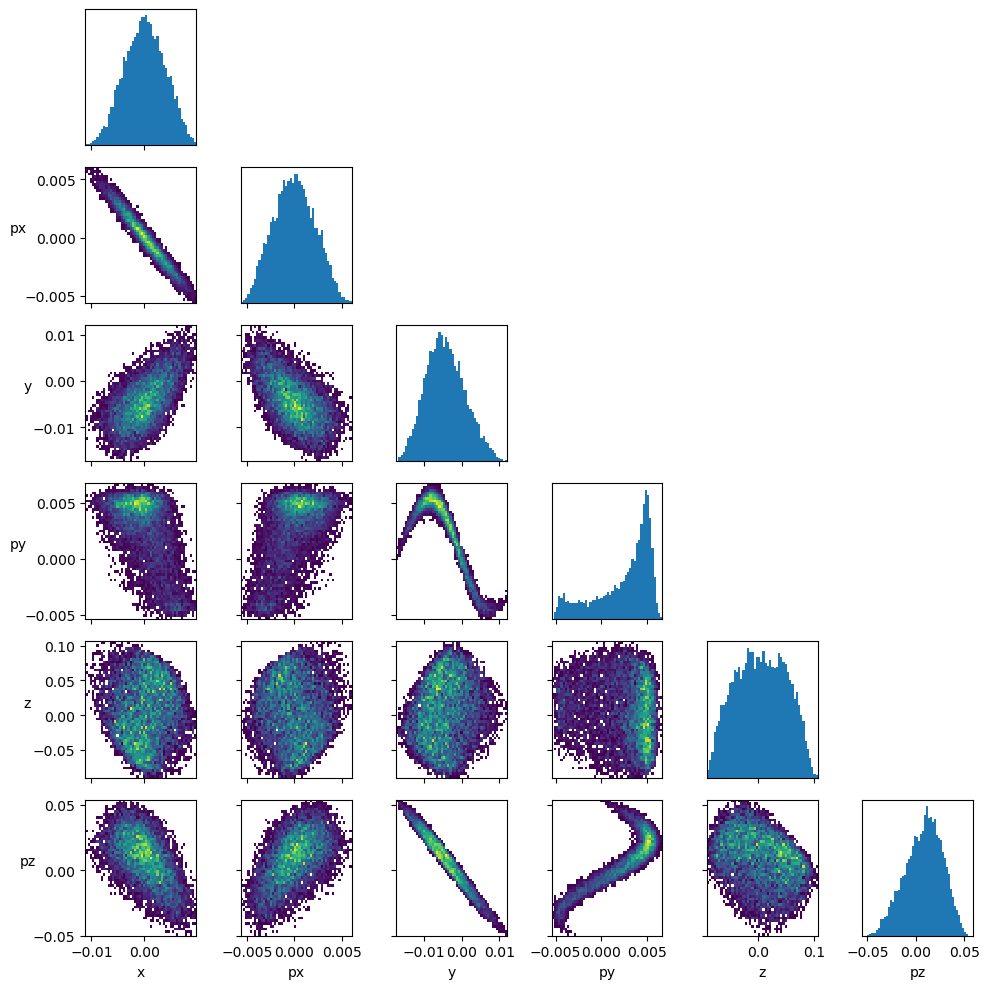

In [8]:
# reconstructed beam: 
plot_projections(predicted_beam.data.detach().cpu().numpy(),
                 labels=['x', 'px', 'y', 'py', 'z', 'pz'],
                 bins=50,
                 background=False)

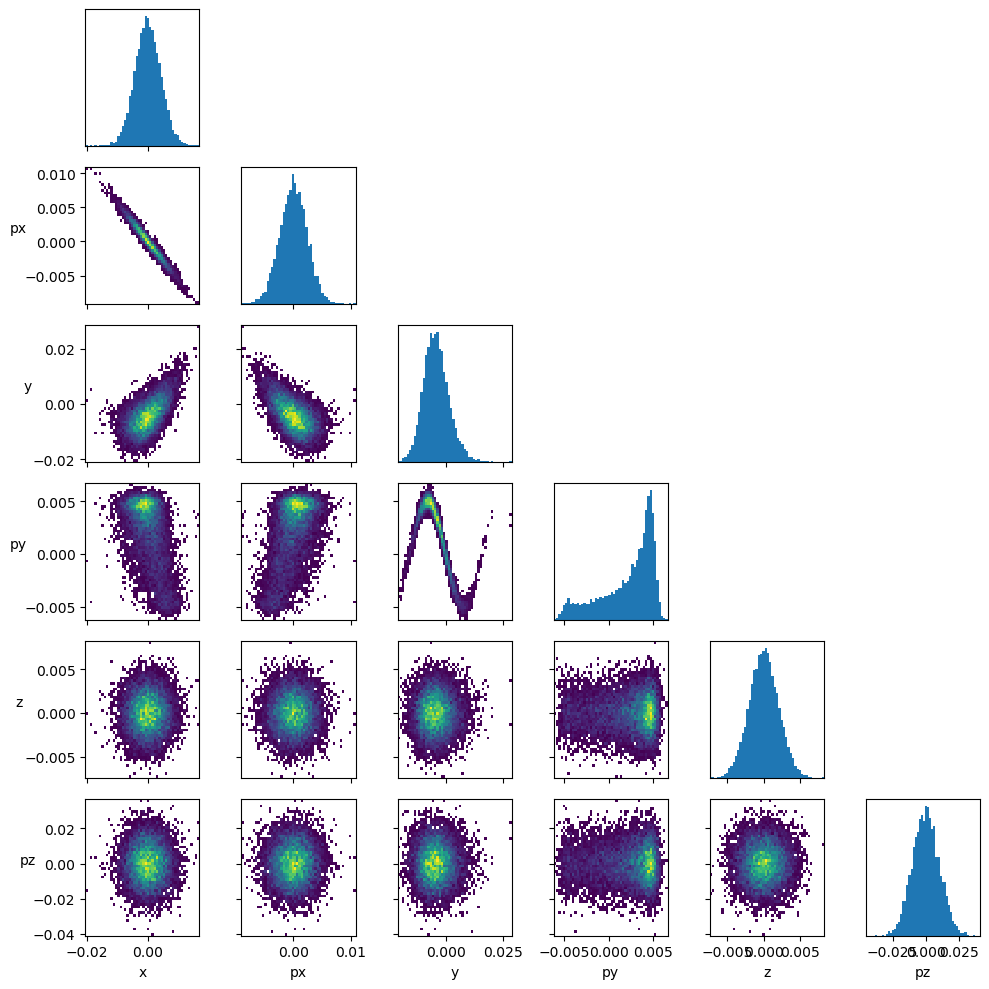

In [9]:
# ground truth beam:
plot_projections(gt_beam.data.numpy(),
                 labels=['x', 'px', 'y', 'py', 'z', 'pz'],
                 bins=50,
                 background=False)

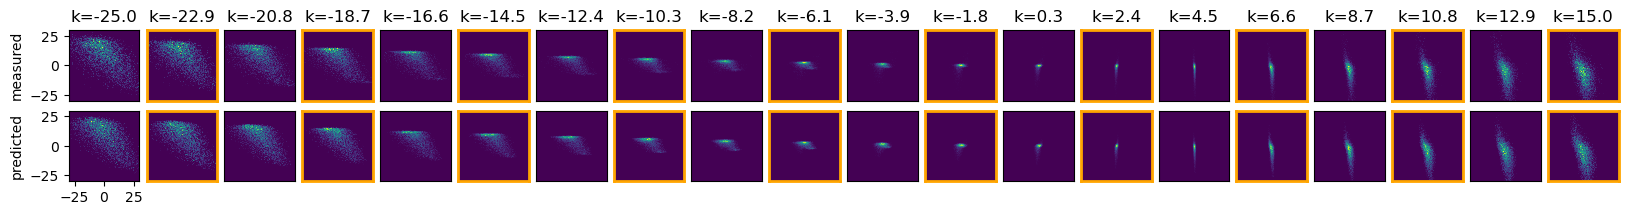

In [10]:
measured_images = scan_data['images']
quad_strengths = scan_data['quad_strengths']
bins = scan_data['bins']

compare_screens(measured_images, predicted_images, bins, quad_strengths, test_ids)